# Decison Trees

In [3]:
import os
os.environ["PATH"] += os.pathsep + "C:\\Program Files\\Graphviz\\bin"  # Replace with the actual path to the GraphViz bin folder


In [1]:
import numpy as np
import pandas as pd
from sklearn import tree


input_file = "C:\\Users\\Admin\\OneDrive\\Documents\\Python\\Assignment\\Decision tree A\\PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [2]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [4]:
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [9]:
# if your system doesnt draw the graph, please install these packages below. 
#! pip install pydotplus
#! pip install graphviz
#! conda install python-graphviz 

'conda' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [6]:
y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

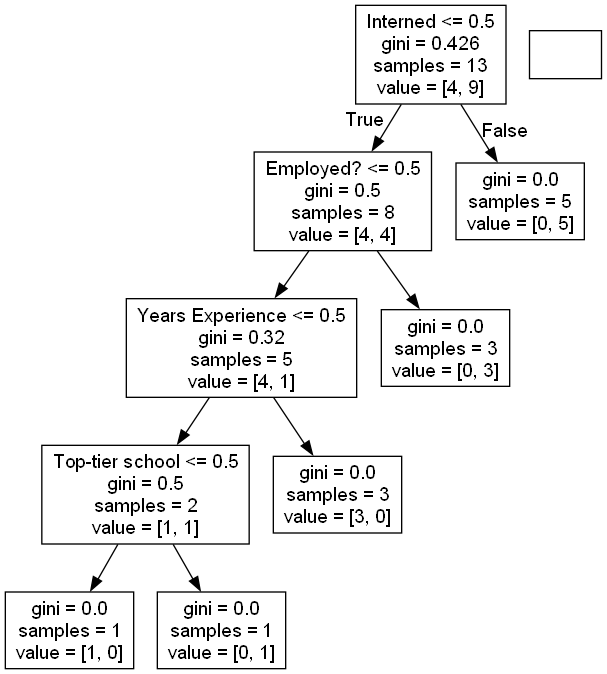

In [9]:
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from io import StringIO

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())


In [17]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))

#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

print (clf.predict([[10, 0, 4, 0, 0, 0]]))

# Predict the employment chance of someone who has 14 years experience,
#  not employed, 2 previous jobs, a Phd, Not from top tier , not interned
print (clf.predict([[14, 0, 4, 0, 0, 0]]))

[1]
[1]
[1]
[1]


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df[features]
y = df['Hired']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, train_size = 0.8, random_state = 0)

In [19]:
print('test set: ' + str(x_test.shape))

test set: (3, 6)


In [20]:
print('train set:' + str(x_train.shape))

train set:(10, 6)


from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
print(accuracy_score(y_test, model.predict(x_test)))